# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load Dataset

In [2]:
data = pd.read_csv("/content/students_personalized_scoring.csv")

# Pisahkan fitur (X) dan label (Y)
X = data.iloc[:, :-1].values  # Semua kolom kecuali label
y = data["Label"].values      # Kolom label

# Pre-processing

In [10]:
categories = [
    "UI/UX", "Programming", "Operational", "Data Science",
    "Cybersecurity", "Quality Assurance", "Computer Network",
    "Project Management", "Product Manager", "Entrepreneur",
    "Business/Commerce/Ideation"
]

In [4]:
# Encode the labels
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Separate features and target
X = data.drop(columns=['Label', 'Label_encoded'])
y = data['Label_encoded']

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

# Reshape data to fit RNN input [samples, time steps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check data shapes
X_train_reshaped.shape, X_test_reshaped.shape, len(label_encoder.classes_)

((320, 1, 11), (80, 1, 11), 11)

# Modelling

In [5]:
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(1, 11), go_backwards=True),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(11, activation='softmax')  # 11 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=200,
    batch_size=8,
    validation_data=(X_test_reshaped, y_test)
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.1219 - loss: 2.4171 - val_accuracy: 0.2125 - val_loss: 2.3496
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1307 - loss: 2.3475 - val_accuracy: 0.2750 - val_loss: 2.3174
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1926 - loss: 2.2858 - val_accuracy: 0.2625 - val_loss: 2.2743
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2014 - loss: 2.2598 - val_accuracy: 0.2125 - val_loss: 2.2262
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2448 - loss: 2.2379 - val_accuracy: 0.3375 - val_loss: 2.1561
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2952 - loss: 2.1617 - val_accuracy: 0.4250 - val_loss: 2.0938
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3674 - loss: 2.0597 - val_accuracy: 0.4375 - val_loss: 2.0261
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3360 - loss: 2.0535 - val_accuracy: 0.4375 - 

# Training

# Evaluation

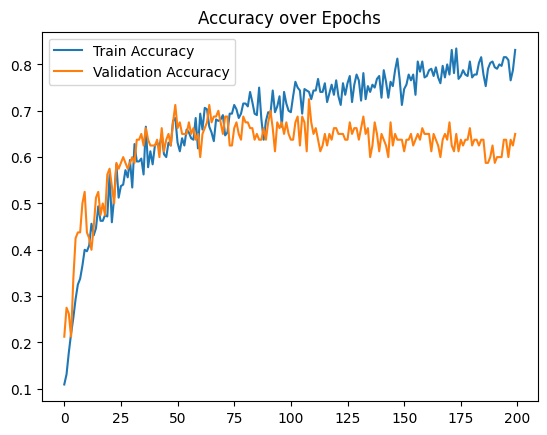

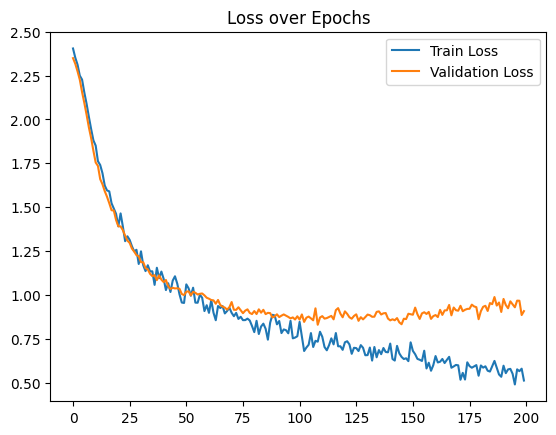

In [6]:
import matplotlib.pyplot as plt

# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step


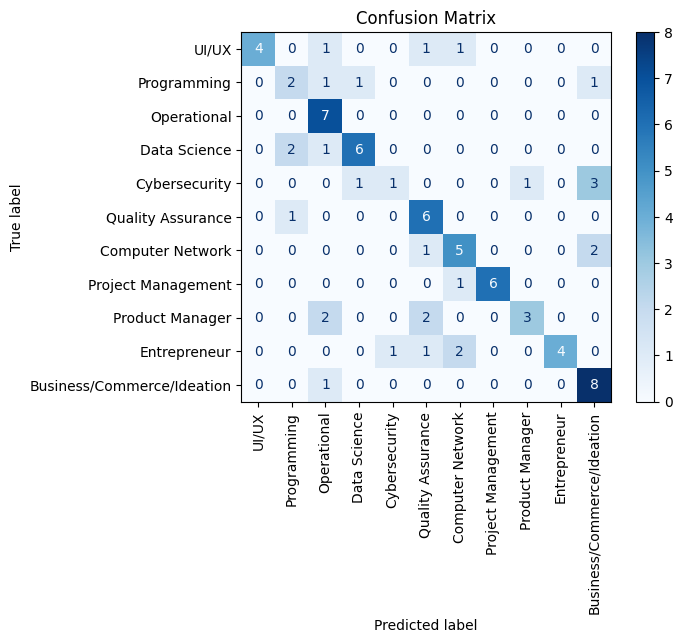

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

# Testing Model

# Save Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Dynamic Threshold: 0.0909

Predictions with Dynamic Threshold:
UI/UX: 0.1339
Operational: 0.1144
Cybersecurity: 0.1419
Project Management: 0.1853
Entrepreneur: 0.1790
Business/Commerce/Ideation: 0.1226


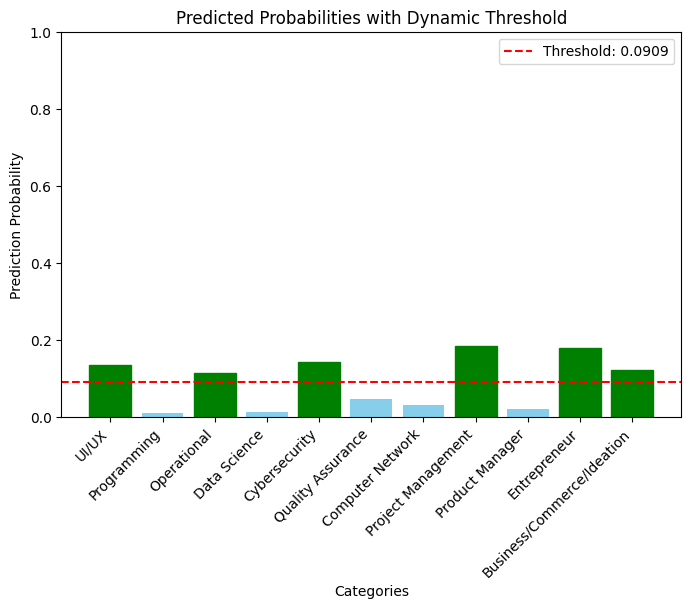

In [8]:
new_data = np.array([[0.9, 0.9, 0.9, 0.8, 0.9, 0.9, 0.8, 0.8, 0.8, 0.9, 0.9]])  # Example input

# Reshape new data for RNN (if needed)
new_data = np.expand_dims(new_data, axis=1)  # (samples, timesteps=1, features)

# Get predictions (output probabilities) for the new data
new_data_prediction = model.predict(new_data)

# Set threshold dynamically based on the mean probability
threshold = np.mean(new_data_prediction[0])  # Use the mean as the dynamic threshold
print(f"Dynamic Threshold: {threshold:.4f}")

# Predictions above dynamic threshold
print("\nPredictions with Dynamic Threshold:")
for i, prob in enumerate(new_data_prediction[0]):
    if prob > threshold:
        print(f"{categories[i]}: {prob:.4f}")

# Bar Chart Visualization with Dynamic Threshold
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, new_data_prediction[0], color='skyblue')

# Highlight bars that exceed the threshold
for bar, prob in zip(bars, new_data_prediction[0]):
    if prob > threshold:
        bar.set_color('green')

# Plot threshold line
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.4f}')
plt.xlabel("Categories")
plt.ylabel("Prediction Probability")
plt.title("Predicted Probabilities with Dynamic Threshold")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [9]:
model.save("model.h5")